Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the titanic dataset into a dataframe

In [2]:
df = pd.read_csv('Titanic.csv')

Display header rows and description of the loaded dataset

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Remove unnecessary features from the dataset

In [5]:
df.drop(['PassengerId', 'SibSp', 'Parch', 'Name', 'Cabin', 'Fare', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,NaN
1,1,1,female,38.0,C
2,1,3,female,26.0,NaN
3,1,1,female,35.0,NaN
4,0,3,male,35.0,S


Manipulate data by replacing empty column values with default values

In [6]:
df['Embarked'] = df['Embarked'].fillna('A')
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,A
1,1,1,female,38.0,C
2,1,3,female,26.0,A
3,1,1,female,35.0,A
4,0,3,male,35.0,S


Perform visualisations

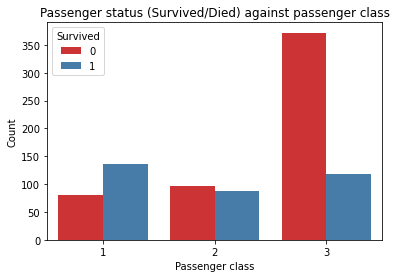

In [7]:
ax = sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=df)
ax.set(title='Passenger status (Survived/Died) against passenger class', xlabel='Passenger class', ylabel='Count')
plt.show()

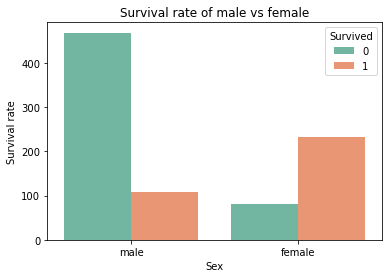

In [8]:
ax = sns.countplot(x='Sex', hue='Survived', palette='Set2', data=df)
ax.set(title='Survival rate of male vs female', xlabel='Sex', ylabel='Survival rate')
plt.show()

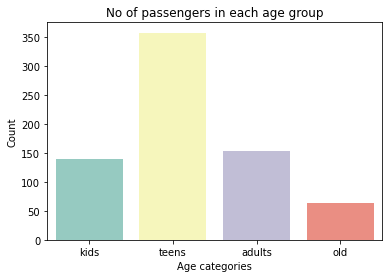

In [9]:
intervals = [0, 18, 35, 50, 100]
categories = ['kids', 'teens', 'adults', 'old']
df['AgeCategories'] = pd.cut(df.Age, intervals, labels=categories)
ax = sns.countplot(x='AgeCategories', palette='Set3', data=df)
ax.set(title='No of passengers in each age group', xlabel='Age categories', ylabel='Count')
plt.show()